# PROJECT NAME :  CAR PRICING DATA ANALYSIS

## 1. Data Preprocessing and Cleaning

### Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import io

import warnings
warnings.filterwarnings("ignore")

### Getting Data :

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
resp = requests.get(url)
text = io.StringIO(resp.text)
df = pd.read_csv(text)

### Understanding Data :

In [3]:
df.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
df.tail(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
203,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


### Replacing Headers :

In [5]:
headers=['symboling','normalized-losses','make','fuel-type','aspiration',
         'num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
         'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

df.columns = headers

In [6]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Replacing "?" with NaN :

In [7]:
df1 = df.replace('?',np.NaN)
df1.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [8]:
df = df1.dropna(subset=["price"],axis=0)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [9]:
# Find the name of the columns in dataframe

print(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


### Understanding the Datatypes :

In [10]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Statistical summary of the Data :

In [11]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [12]:
df[['symboling','wheel-base']].describe()

,symboling,wheel-base
count,200.000000,200.000000
mean,0.830000,98.848000
std,1.248557,6.038261
min,-2.000000,86.600000
25%,0.000000,94.500000
50%,1.000000,97.000000
75%,2.000000,102.400000
max,3.000000,120.900000


### Missingness Evaluation :

In [13]:
# 1. .isnull()
# 2. .notnull()

missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

symboling             0
normalized-losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

### Dealing with missing values :

In [15]:
# 1. drop ( row,column)
# 2. replace ( mean,median,other functions)

### 1. Column -> normalized-losses

In [16]:
# calculate mean for normalized-losses

avg_norm_loss = df['normalized-losses'].astype('float').mean()
print("Average normalized losses is: ",avg_norm_loss)

# now replace NaN with mean

df['normalized-losses'].replace(np.nan,avg_norm_loss,inplace=True)
print("Values of normliazed losses is replaced with mean: ")
df.head(5)

Average normalized losses is:  122.0
Values of normliazed losses is replaced with mean: 


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [17]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### 2. Column -> bore

In [18]:
# now replace mean for the column bore

avg_bore = df['bore'].astype('float').mean()
print("Avg bore :",avg_bore)

# replace

df['bore'].replace(np.NaN,avg_bore,inplace=True)
print("After replacing: ")
df

Avg bore : 3.3300000000000005
After replacing: 


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [19]:
# now check:

df['bore'].isnull().sum()

0

In [20]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### 3. Column -> stroke

In [21]:
# column stroke

# mean
avg_stroke = df['stroke'].astype('float').mean()
print("Avg stroke is: ",avg_stroke)

# replace 
df['stroke'].replace(np.NaN,avg_stroke,inplace=True)
print("After replacing: ")
df

Avg stroke is:  3.2598469387755036
After replacing: 


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### 4. Column -> horse power

In [22]:
# horse power column

avg_horse = df['horsepower'].astype('float').mean()
print(avg_horse)

# replace

df['horsepower'].replace(np.NaN,avg_horse,inplace=True)
df

103.35858585858585


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### 5. Column -> peak-rpm

In [23]:
# column peak-rpm

# mean

avg_rpm = df['peak-rpm'].astype('float').mean()
print(avg_rpm)

# replace

df['peak-rpm'].replace(np.NaN,avg_rpm,inplace=True)
df

5118.181818181818


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### 6. Column -> num-of-doors

In [24]:
# We can clearly see that for the column ( num-of-doors ) . 
# four is the most frequent item. therefore we are replacing with "Four"

df['num-of-doors'].value_counts()

four    113
two      85
Name: num-of-doors, dtype: int64

In [25]:
df['num-of-doors'].replace(np.NaN,'four',inplace=True)

In [26]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now we can see all the missing values are handled appropriatley.

### Checking for the format of the data :

In [27]:
# The Last Step in Data Cleaning is to check the format of tha datas.

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [28]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [29]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [30]:
df['drive-wheels']=df['drive-wheels'].replace('4wd','fwd')

### Data Normalization :

In [31]:
# Normalization is used to transform the values into similar range

In [32]:
df['length'] = (df['length'] - df['length'].min())/(df['length'].max()-df['length'].min())
df['width'] = (df['width'] - df['width'].min())/(df['width'].max()-df['width'].min())
df['height'] = (df['height'] - df['height'].min())/(df['height'].max()-df['height'].min())

In [33]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0


### Data Standardization :

In [34]:
# Transformaing the data into a common format

# where  "city-mpg" and "highway-mpg" are in unit mpg. where some country accept it as L/100km.

# so transform it

df['city-L/100km'] = 235/df['city-mpg']
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,fwd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


### Indicator Variable :

### 1. Column -> fuel-type

An indicator variable (or dummy variable) is a numerical variable used to label categories

In [35]:
# The column "fuel-type" has 2 unique values: "gas" or "diesel".
# using pandas get_dummies


dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head(5)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [36]:
# Now change the column names for better understanding

dummy_variable_1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)
dummy_variable_1.head(5)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [37]:
# merge data from df and dummy_variable_1

df = pd.concat([df,dummy_variable_1],axis=1)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,0,1
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,0,1
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.4,...,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,0,1
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.5,110,5500.0,19,25,15250.0,12.368421,0,1


In [38]:
# now drop fuel_type

df.drop("fuel-type",axis=1,inplace=True)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.413433,...,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.449254,...,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.529851,...,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.4,0.529851,...,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.540299,...,3.40,8.5,110,5500.0,19,25,15250.0,12.368421,0,1


### 2. column -> aspiration

In [39]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.head(5)

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [40]:
dummy_variable_2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
dummy_variable_2.head(5)

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [41]:
df = pd.concat([df,dummy_variable_2],axis=1)
df.drop('aspiration',axis=1,inplace=True)
df.head(5)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,...,111,5000.0,21,27,16500.0,11.190476,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.449254,0.444444,...,154,5000.0,19,26,16500.0,12.368421,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.529851,0.504274,...,102,5500.0,24,30,13950.0,9.791667,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.4,0.529851,0.521368,...,115,5500.0,18,22,17450.0,13.055556,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.540299,0.512821,...,110,5500.0,19,25,15250.0,12.368421,0,1,1,0


### Now the data is cleaned.

### FINAL DATA :

In [42]:
df.head(5)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,...,111,5000.0,21,27,16500.0,11.190476,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.449254,0.444444,...,154,5000.0,19,26,16500.0,12.368421,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.529851,0.504274,...,102,5500.0,24,30,13950.0,9.791667,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.4,0.529851,0.521368,...,115,5500.0,18,22,17450.0,13.055556,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.540299,0.512821,...,110,5500.0,19,25,15250.0,12.368421,0,1,1,0


## EDA -> Exploratory Data Analysis

### Analyzing individual feature patterns using visulaization

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# for the plot should appear in same window

In [44]:
# check the data type of the column peak-rpm

df['peak-rpm'].dtypes

dtype('float64')

In [45]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145667,0.008244,-0.181073,0.284011,-0.030158,0.041248,-0.083327,0.062423,-0.195381,0.195381,0.050995,-0.050995
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029867,0.055759,-0.114738,0.239580,-0.225255,-0.182011,0.133999,0.238712,-0.101574,0.101574,0.006915,-0.006915
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501534,0.144675,0.249689,-0.364971,-0.480029,-0.552211,0.589147,0.484047,0.306706,-0.306706,-0.254907,0.254907
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610817,0.120888,0.159203,-0.286754,-0.667658,-0.700186,0.691044,0.659174,0.210616,-0.210616,-0.229294,0.229294
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548478,0.182855,0.189008,-0.247388,-0.638155,-0.684700,0.752795,0.677111,0.243448,-0.243448,-0.304459,0.304459
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187794,-0.081273,0.259526,-0.315756,-0.057087,-0.111568,0.137284,0.008923,0.281198,-0.281198,-0.086531,0.086531
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644532,0.168642,0.156444,-0.279411,-0.750390,-0.795515,0.834420,0.785868,0.221082,-0.221082,-0.322097,0.322097
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572786,0.208004,0.029005,-0.256702,-0.651002,-0.679877,0.872337,0.745337,0.070925,-0.070925,-0.110278,0.110278
bore,-0.145667,-0.029867,0.501534,0.610817,0.548478,0.187794,0.644532,0.572786,1.000000,-0.051087,0.002021,-0.267010,-0.581365,-0.590753,0.543431,0.554069,0.055371,-0.055371,-0.229304,0.229304
stroke,0.008244,0.055759,0.144675,0.120888,0.182855,-0.081273,0.168642,0.208004,-0.051087,1.000000,0.186761,-0.066173,-0.040677,-0.040282,0.083296,0.041470,0.240013,-0.240013,-0.215759,0.215759


In [46]:
# corr for particular columns

df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio
bore,1.000000,-0.051087,0.002021
stroke,-0.051087,1.000000,0.186761
compression-ratio,0.002021,0.186761,1.000000


### Continuos Numerical variable

### Reg plot

### (i) Engine-size and price

(0.0, 52851.01627448897)

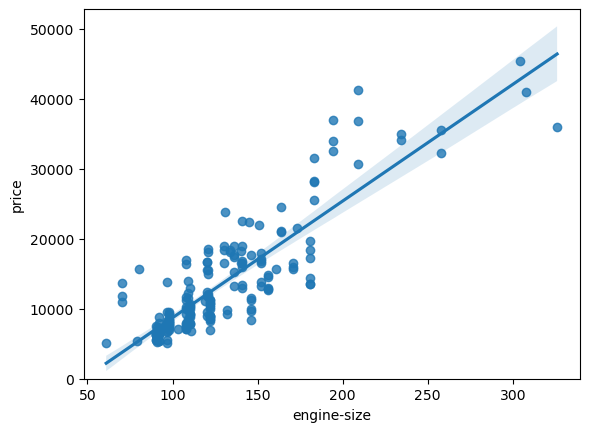

In [47]:
sns.regplot(x='engine-size',y='price',data=df)
plt.ylim(0,)

In [48]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


### Conclusion :
    * When engine size increases, price also increases. which shows positive linear relationship.
    * We can see that correlation between the engine size and price is 87% .
    * where the engine size is good predictor variable for price.

### (ii) Highway-mpg and price

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

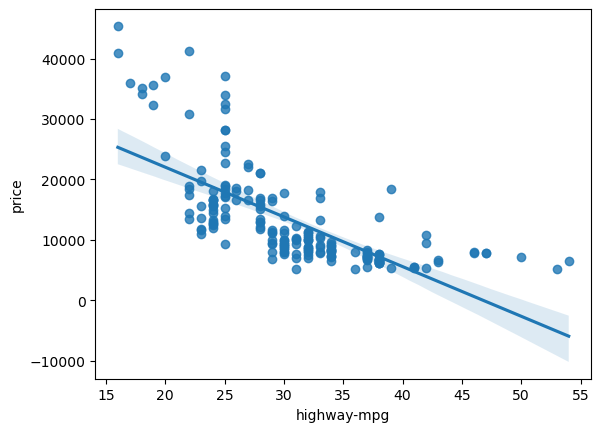

In [49]:
sns.regplot(x='highway-mpg',y='price',data=df)

In [50]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.705115
price,-0.705115,1.000000


### Conclusion:

        * When the highway-mpg increases the price decreases.which is a Negative/Inverse linear relationship.
        * Where the corr between the highway-mpg and price is -70%
        

### (iii) peak-rpm and price

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

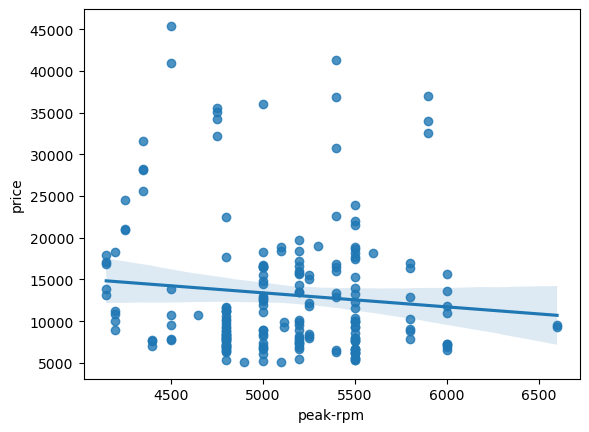

In [51]:
sns.regplot(x='peak-rpm',y='price',data=df)

In [52]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101519
price,-0.101519,1.000000


### Conclusion :

    * Where the fitted line is close to horizontal.
    * Also the points are very much scattered from the line.
    * Therefore it is weak linear relationship and peak-rpm is not a good predictor for price.

### (iv) stroke and price

<AxesSubplot:xlabel='stroke', ylabel='price'>

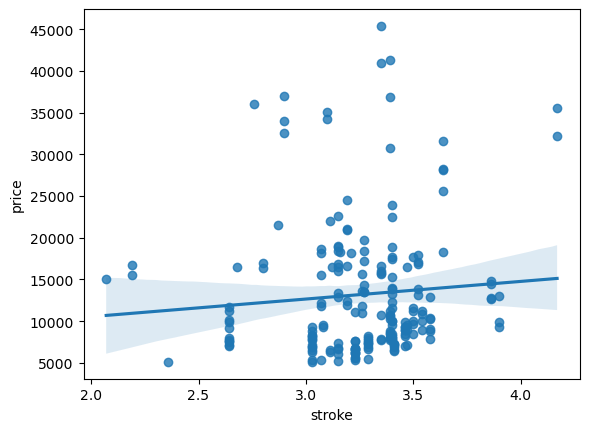

In [53]:
sns.regplot(x='stroke',y='price',data=df)

In [54]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.083296
price,0.083296,1.000000


### Conclusion :

    * Where the fitted line is close to horizontal.
    * Also the points are very much scattered from the line.
    * Therefore it is weak linear relationship and stroke is not a good predictor for price.

# Categorical Variable

In [55]:
# Categorical variables -> count plot, bar plot, pie chart.
# if we have one numerical and one categorical then box plot also aplicable.

<AxesSubplot:xlabel='body-style', ylabel='price'>

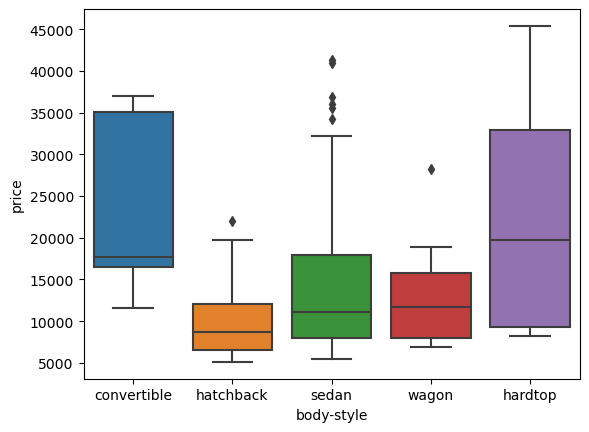

In [56]:
sns.boxplot(x='body-style',y='price',data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

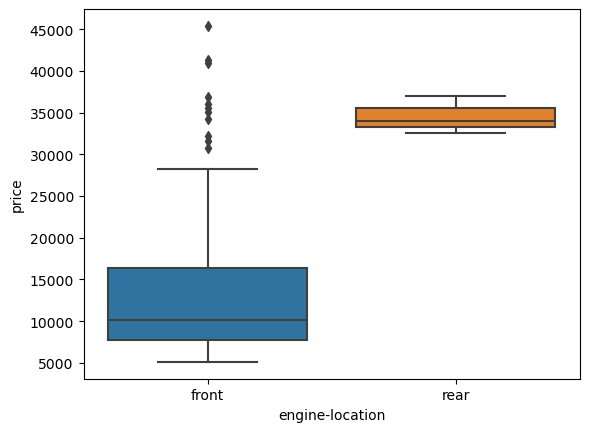

In [57]:
sns.boxplot(x='engine-location',y='price',data=df)

### Conclusion :

    * where the price between the engine location is differs.
    * where the engine location also a good predictor for price.

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

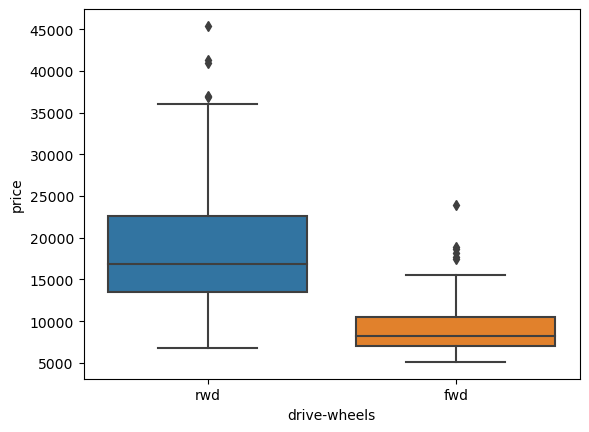

In [58]:
sns.boxplot(x='drive-wheels',y='price',data=df)

### Conclusion :

    * Where the price between the different drive wheels differes.
    * As the drive-wheels could potentially be a predictor of price.

### Descriptive Statistical Analysis :

In [59]:
# Automatically computes basic statistics for continuos variables.
# NaN values are automatically skipped.

In [60]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,0.494448,0.478462,0.499292,2555.705000,126.860000,3.330000,3.259847,10.170100,5118.181818,25.200000,30.705000,13205.690000,9.937914,0.100000,0.900000,0.820000,0.180000
std,1.248557,32.076542,6.038261,0.184286,0.179735,0.202371,518.594552,41.650501,0.268562,0.314177,4.014163,479.240110,6.432487,6.827227,7966.982558,2.539415,0.300753,0.300753,0.385152,0.385152
min,-2.000000,65.000000,86.600000,0.000000,0.000000,0.000000,1488.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,100.250000,94.500000,0.381716,0.331197,0.350000,2163.000000,97.750000,3.150000,3.117500,8.575000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.479104,0.444444,0.525000,2414.000000,119.500000,3.310000,3.290000,9.000000,5159.090909,24.000000,30.000000,10270.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,138.250000,102.400000,0.632836,0.544872,0.643750,2928.250000,142.000000,3.582500,3.410000,9.400000,5500.000000,30.000000,34.000000,16500.750000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


### value_Counts :

In [61]:
df['drive-wheels'].value_counts()

fwd    126
rwd     74
Name: drive-wheels, dtype: int64

In [62]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,126
rwd,74


### Correlation and Causation :

    * if the pvalue is <0.001 there is strong evidence that correlation is significant.
    * if pvalue is <0.05 there is moderate evidence that correlation is significant.
    * if pvalue is <0.1 there is weak evidence
    * if pvalue is >0.1 there is no evidence.

In [63]:
from scipy import stats

In [64]:
# Wheel-Base vs Price

pearson_coef, p_value = stats.pearsonr(df['wheel-base'],df['price'])
print("The Pearson Correlation is",pearson_coef," with a p-value of p=",p_value)

The Pearson Correlation is 0.5891470005448702  with a p-value of p= 4.4570195020504053e-20


### Conclusion :

    * Since p-value is <0.001.
    * Therefore the corr between wheel base and price is statistically significant.
    * although the linear relationship isnt extremely strong.

In [65]:
# horsepower vs price

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8097357390985241  with a P-value of P =  1.0089009233334041e-47


### Conclusion :

    * since p-value is <0.001.
    * statistically significant.
    * linear relationship quite strong.

In [66]:
# Engine-Size vs. Price

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723367498521142  with a P-value of P = 1.8977171466563487e-63


### Conclusion :

    * since p-value is <0.001.
    * statistically significant.
    * linear relationship quite strong close to 1.

In [67]:
# Bore vs. Price

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5434310033088076  with a P-value of P =   9.20974963085112e-17


### Conclusion :

    * since p-value is <0.001.
    * statistically significant.
    * Although linear relationship not strong.

In [68]:
# City-mpg vs. Price

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6871861020862686  with a P-value of P =  2.729256568479228e-29


### Conclusion :

    * since p-value is <0.001.
    * statistically significant.
    * Although linear relationship is negative and modertley strong.

In [69]:
# Highway-mpg vs. Price

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7051147088046403  with a P-value of P =  2.1973260531584904e-31


### Conclusion :

    * since p-value is <0.001.
    * statistically significant.
    * Although linear relationship is negative and modertley strong.

### Conclusion : Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. 

Continuous numerical variables:

    Length
    Width
    Curb-weight
    Engine-size
    Horsepower
    City-mpg
    Highway-mpg
    Wheel-base
    Bore
Categorical variables:

    Drive-wheels
As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

## MODEL DEVELOPMENT :

### Simple Linear Regression

In [70]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df.head(5)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,...,111.0,5000.0,21,27,16500.0,11.190476,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.449254,0.444444,...,154.0,5000.0,19,26,16500.0,12.368421,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.529851,0.504274,...,102.0,5500.0,24,30,13950.0,9.791667,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.4,0.529851,0.521368,...,115.0,5500.0,18,22,17450.0,13.055556,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.540299,0.512821,...,110.0,5500.0,19,25,15250.0,12.368421,0,1,1,0


In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
# mask

msk = np.random.rand(len(df))<0.8
train = df[msk]
test = df[~msk]

In [74]:
# check using highway-mpg as x and price as y.

model = LinearRegression()

x_train = np.asanyarray(train[['highway-mpg']]) 
y_train = np.asanyarray(train[['price']])

fitted = model.fit(x_train,y_train)

print("Intercept is : ",fitted.intercept_)
print("Slope is: ",fitted.coef_)

Intercept is :  [36476.57287706]
Slope is:  [[-758.36490718]]


In [75]:
# Predict

x_test = np.asanyarray(test[['highway-mpg']])
y_test = np.asanyarray(test[['price']])

y_hat = fitted.predict(x_test)

In [76]:
y_hat[0:5]

array([[16759.08529039],
       [19792.54491911],
       [17517.45019757],
       [14483.99056885],
       [17517.45019757]])

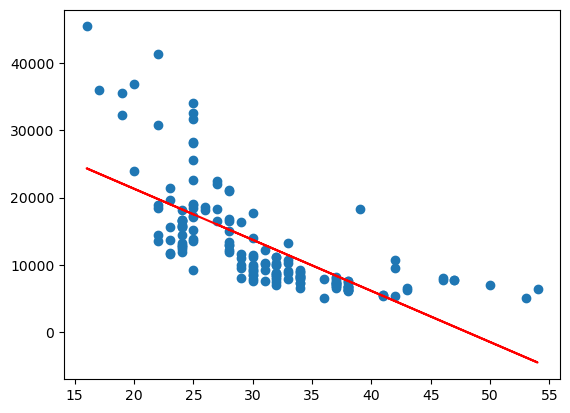

In [77]:
# Scatter

plt.scatter(x_train,y_train)
plt.plot(x_train,fitted.coef_[0][0]*x_train+fitted.intercept_[0],'-r')


In [78]:
# model evaluation

from sklearn.metrics import r2_score

print("R2 score : ",r2_score(y_test,y_hat))

R2 score :  0.5227743255105642


 Very lower R2 score which is not good.

## Multiple Linear Regression

using curb-weight, Engine-size, Horsepower, Highway-mpg to predict price


In [79]:
data = df[['curb-weight','engine-size','horsepower','highway-mpg','price']]
data.head(5)

,curb-weight,engine-size,horsepower,highway-mpg,price
0,2548,130,111.0,27,16500.0
1,2823,152,154.0,26,16500.0
2,2337,109,102.0,30,13950.0
3,2824,136,115.0,22,17450.0
4,2507,136,110.0,25,15250.0


In [80]:
# msk

msk = np.random.rand(len(df))<0.8
train = df[msk]
test = df[~msk]

In [81]:
# modeling

x_train = np.asanyarray(train[['curb-weight','engine-size','horsepower','highway-mpg']])
y_train = np.asanyarray(train[['price']])

model = LinearRegression()

fit = model.fit(x_train,y_train)

print("Intercept is: ",fit.intercept_)
print('slope is :',fit.coef_)

Intercept is:  [-15499.72343549]
slope is : [[ 4.92861687 86.15595051 44.36378494 20.22638857]]


In [82]:
# Test

x_test = np.asanyarray(test[['curb-weight','engine-size','horsepower','highway-mpg']])
y_test = np.asanyarray(test[['price']])

y_hat = fit.predict(x_test)

y_hat[0:5]

array([[18867.37544245],
       [15682.71568416],
       [13959.20437823],
       [19560.45467022],
       [28260.40897215]])

In [83]:
# Model Evaluation

print("R2 score: ",r2_score(y_test,y_hat))

R2 score:  0.7112604919942935


### CONCLUSION :

    * In Simple Linear we got the Accuracy of 37 %
    * In Multiple Linear we got the Accuracy of 75%
    * Higher the Accuracy the better the model fits.
    * Therefore Multiple Linear Regression seems to be better fit in this case compared to SLR.

## EVALUATION

### SLR : K FOLD CROSS VALIDATION

In [84]:
# To know the Out of sample accuracy we use K-FOLD-CROSS-VALIDATION

from sklearn.model_selection import cross_val_score

In [85]:
Rcross = cross_val_score(fitted,df[['highway-mpg']],df[['price']],cv=4)
Rcross

array([0.56379294, 0.50663752, 0.35917242, 0.11951847])

In [86]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.3872803355199643 and the standard deviation is 0.17167506181948017


### MLR : K FOLD CROSS VALIDATION

In [87]:
Rcross = cross_val_score(fit,df[['curb-weight','engine-size','horsepower','highway-mpg']],df[['price']],cv=4)
Rcross

array([0.84471035, 0.78574244, 0.56403726, 0.46278596])

In [88]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.6643190012387223 and the standard deviation is 0.15649016252500242


# CONCLUSION :

## SLR VS MLR

    * MLR have higher out os sample Accuracy when compared to SLR.
    * MLR is the best model fit fot the data.